In [1]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ


/anaconda3/envs/qiskitenv/lib/python3.7/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
# Only need to do once
#IBMQ.save_account('3b49c9887da9c1d964ddae87e0940b1489f64341d7c4bddc769b0a96709c36ea76c935dc3e6e881476c063a608d67d7874cd412f3da8136214ed966359aac728')

In [8]:
accountinfo=IBMQ.stored_accounts()
token=accountinfo[0]['token']
IBMQ.enable_account(token)

In [9]:
# if account loded right, the output is not an empty list
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [10]:
from qiskit.providers.ibmq import least_busy
large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits > 2 and not x.configuration().simulator)
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())


The best backend is ibmqx4


In [2]:
q=QuantumRegister(2)
c=ClassicalRegister(2)
cir=QuantumCircuit(q,c)
cir.h(q[0])
cir.h(q[1])
cir.cx(q[0],q[1])
cir.measure(q[0],c[0])
cir.measure(q[1],c[1])

cir.draw()

In [3]:
# simulate on local classical computer
job=execute(cir, backend=Aer.get_backend('qasm_simulator'), shots=1024)
result=job.result()

In [4]:
# to monitor the job
job_monitor(job)

HTML(value="<p style='font-size:16px;'>Job Status: job has successfully run </p>")

In [5]:
print(result.get_counts())

{'11': 269, '10': 273, '01': 229, '00': 253}


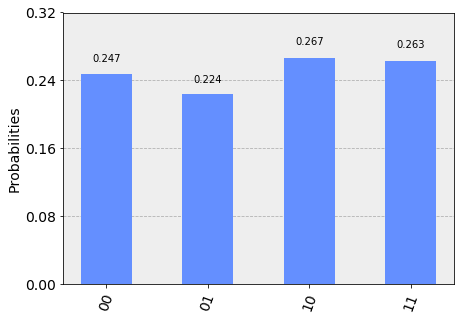

In [6]:
#this is the ibmqx result
plot_histogram(result.get_counts())

In [12]:
job=execute(cir,backend=IBMQ.get_backend('ibmqx4'),shots=1024)

In [ ]:
job_monitor(job)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [ ]:
result=job.result()
